Puneet Sharma

Aim - Prediction using Decision Tree

Dataset - Iris


#**Getting Datset and Pre-Processing**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('./content')

Mounted at ./content


In [3]:
data_url = "/content/content/MyDrive/Grip/Task-2_Prediction using Unsupervised ML/Iris.csv"
data = pd.read_csv(data_url)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data = data.drop('Id', axis=1)

In [12]:
data.isnull().sum()



SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

Splitting dataset for test and train

In [27]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=12)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#model fitting and prediction

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
pred = model.predict(xtest)

In [32]:
from sklearn.metrics import accuracy_score

Accuracy check

In [34]:
accuracy_score(ytest,pred)

0.9777777777777777

In [15]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


Plotting Tree

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt


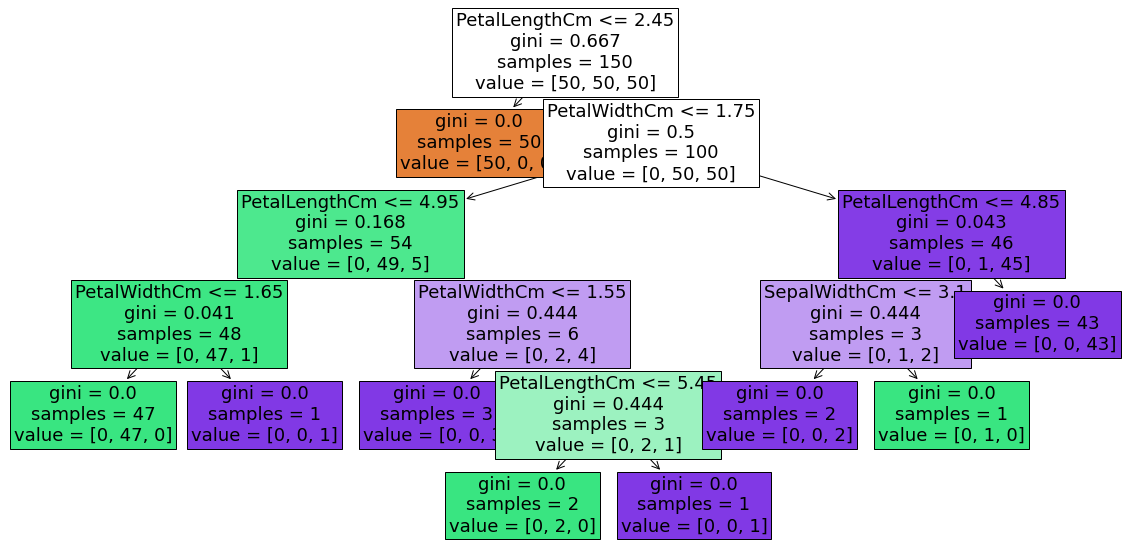

In [22]:
plt.figure(figsize=(20,10))
model_plot = tree.plot_tree(model,feature_names = x.columns,filled=True,fontsize=18)

#custom Input

In [26]:
user_in =  pd.DataFrame({'Sepal_l':[4.8,4.8,2.8,1.5,5.5],'Sepal_w':[1.1,2.3,5.6,1.8,2.3],'Petal_l':[4.8,4.8,2.8,1.5,5.5],'Petal_w':[1.1,2.3,5.6,1.8,2.3]})
user_in

,Sepal_l,Sepal_w,Petal_l,Petal_w
0,4.8,1.1,4.8,1.1
1,4.8,2.3,4.8,2.3
2,2.8,5.6,2.8,5.6
3,1.5,1.8,1.5,1.8
4,5.5,2.3,5.5,2.3


In [35]:
pred_in = model.predict(user_in)

In [36]:
pred_in

array([1, 2, 1, 2, 2])